In [43]:
!pip install --upgrade pandas

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # To visualize the iterative adjustment of the algorithm
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(50)

In [45]:
# Read our data from csv file
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [46]:
# Create dataset from Pandas dataframe
X = data.loc[:,0:1] # We fecth everything from the 0 and 1 columns for X
y = data.loc[:,2] # We fecth everything from 2 COLUMN FOR y

In [47]:
# Convert dataset to Numpy
X = X.to_numpy()
y = y.to_numpy()

In [48]:
# Helper functions to make a prediction
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0]) # The boundary line equation

In [49]:
# The inputs are the data X, the labels y, the weights W (as an array), and the bias b,
# We update the weights and bias W, b, according to the perceptron algorithm, and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        predicted_y = prediction(X[i], W, b)
        
        if y[i] - predicted_y == 1: # y' is misclassified as a negative in the positive area
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i] - predicted_y == -1: # y' is misclassified as a positive in the negative area
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [50]:
# This function runs the perceptron algorithm repeatedly on the dataset and graphs it to see the iterative change
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])

    W = np.array(np.random.rand(2, 1)) # We start with a random W and b as a starting point for our regression line, and then adjust it
    b = np.random.rand(1)[0] + x_max
    print(f"The initial values are:\nW: {W}\nBias: {b}\n")
    
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step to update W & b
        W, b = perceptronStep(X, y, W, b, learn_rate)
        
        # Visualize data and decision boundary. All the following code has to do with the visualization of the graph
        plt.figure()
        
        # Highlight the data point for the current iteration
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.scatter(X[i, 0], X[i, 1], c='red', marker='o', s=100)  # Highlight the current data point

        plt.xlim(x_min - 1, x_max + 1)
        plt.ylim(y_min - 1, y_max + 1)

        xx, yy = np.meshgrid(np.arange(x_min - 1, x_max + 1, 0.01),
                             np.arange(y_min - 1, y_max + 1, 0.01))
        Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.RdBu, alpha=0.5)

        plt.title(f'Epoch {i + 1}')
        plt.show()
        
        print(f"Training epoch: #{i + 1}")
        print(f"Updated Weight: {W}")
        print(f"Updated Bias: {b}")

    return W, b


The initial values are:
W: [[0.49460165]
 [0.2280831 ]]
Bias: 1.2554739237572115



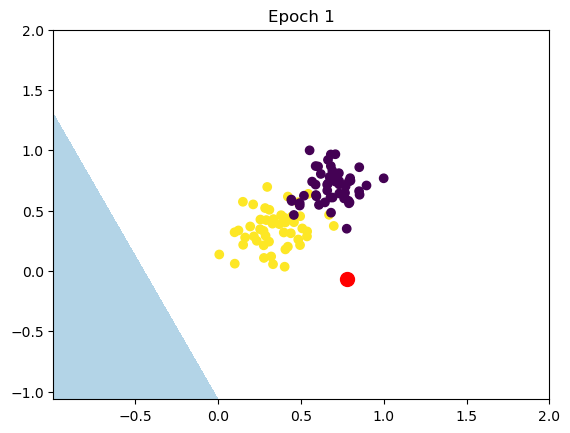

Training epoch: #1
Updated Weight: [[0.46029765]
 [0.19313256]]
Updated Bias: 1.205473923757217


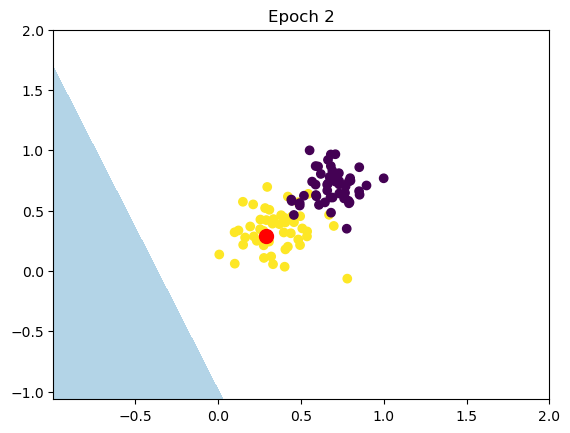

Training epoch: #2
Updated Weight: [[0.42599365]
 [0.15818202]]
Updated Bias: 1.1554739237572225


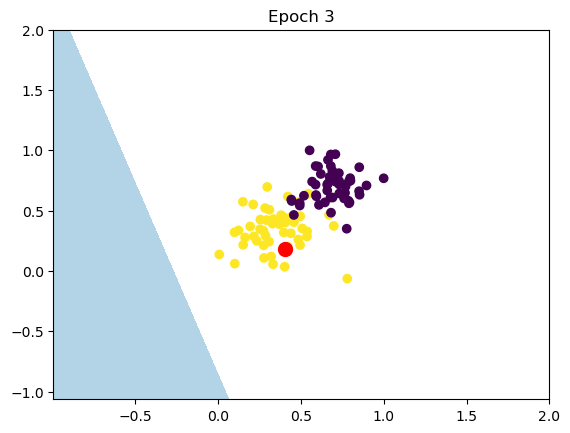

Training epoch: #3
Updated Weight: [[0.39168965]
 [0.12323148]]
Updated Bias: 1.105473923757228


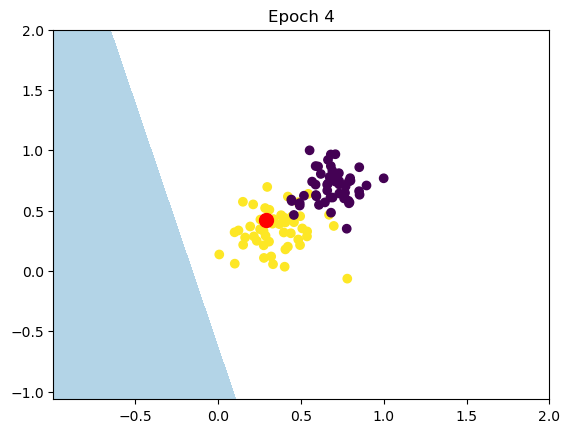

Training epoch: #4
Updated Weight: [[0.35738565]
 [0.08828094]]
Updated Bias: 1.0554739237572335


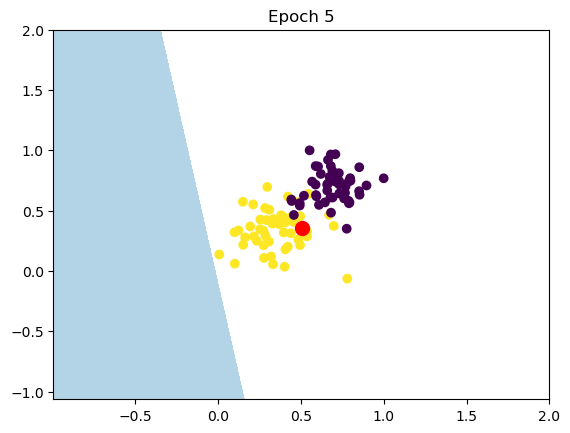

Training epoch: #5
Updated Weight: [[0.32308165]
 [0.0533304 ]]
Updated Bias: 1.005473923757239


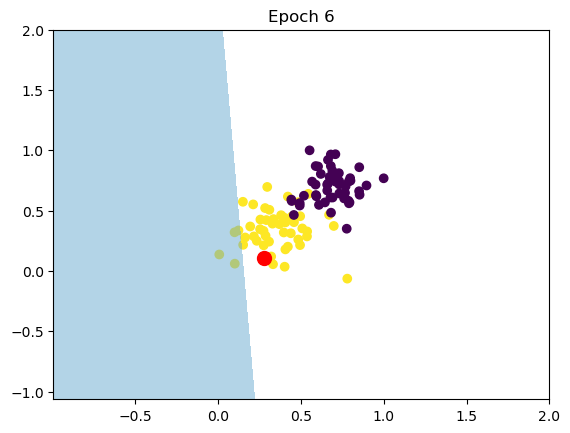

Training epoch: #6
Updated Weight: [[0.28877765]
 [0.01837986]]
Updated Bias: 0.9554739237572395


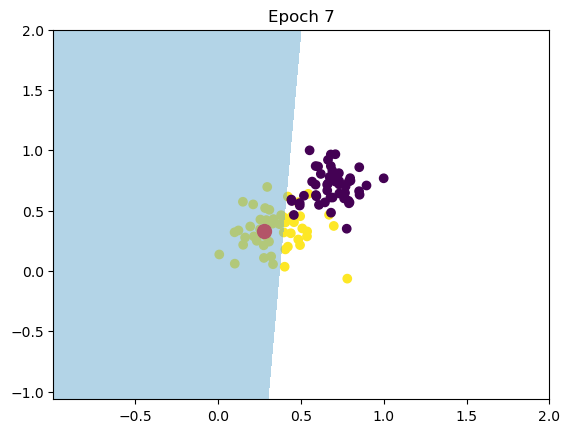

Training epoch: #7
Updated Weight: [[ 0.25447365]
 [-0.01657068]]
Updated Bias: 0.9054739237572395


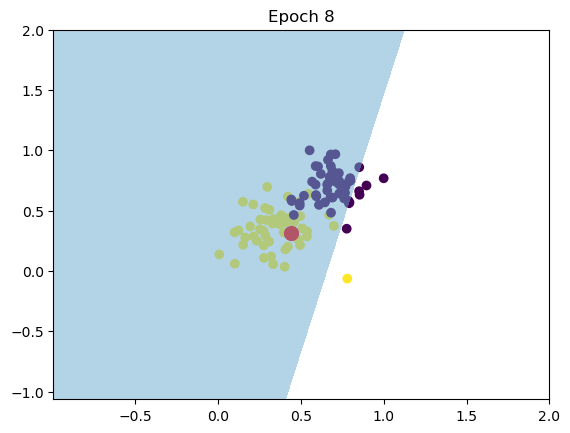

Training epoch: #8
Updated Weight: [[ 0.22016965]
 [-0.05152122]]
Updated Bias: 0.8554739237572394


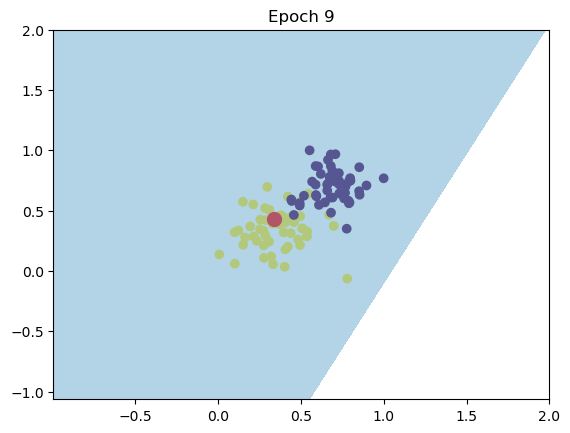

Training epoch: #9
Updated Weight: [[ 0.18586565]
 [-0.08647176]]
Updated Bias: 0.8054739237572394


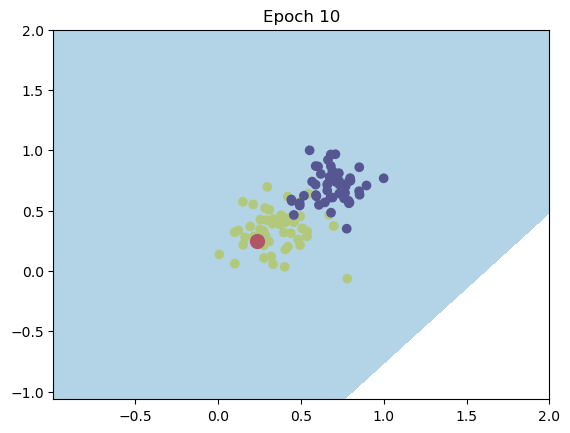

Training epoch: #10
Updated Weight: [[ 0.15156165]
 [-0.1214223 ]]
Updated Bias: 0.7554739237572393


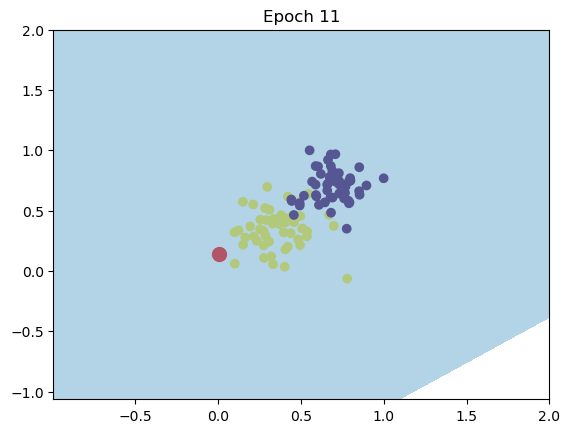

Training epoch: #11
Updated Weight: [[ 0.11725765]
 [-0.15637284]]
Updated Bias: 0.7054739237572393


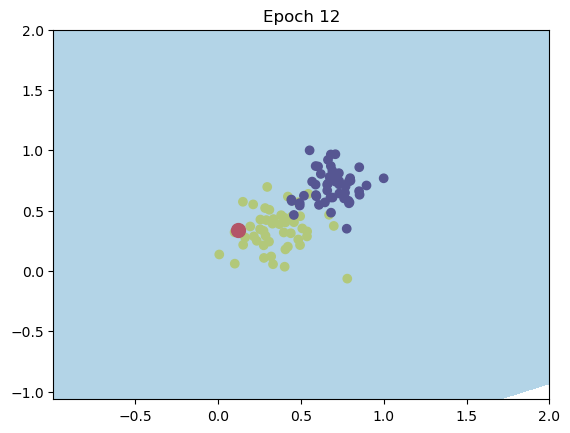

Training epoch: #12
Updated Weight: [[ 0.08295365]
 [-0.19132338]]
Updated Bias: 0.6554739237572392


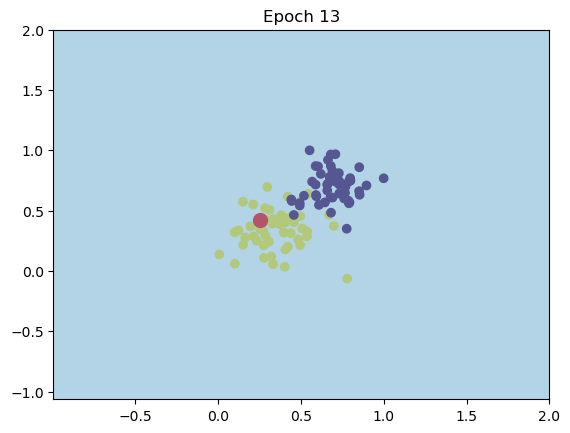

Training epoch: #13
Updated Weight: [[ 0.04864965]
 [-0.22627392]]
Updated Bias: 0.6054739237572392


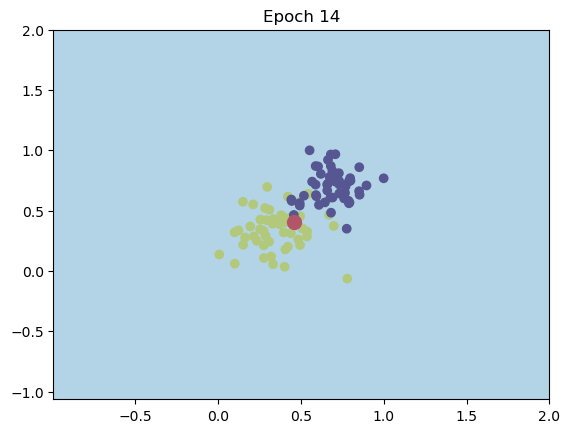

Training epoch: #14
Updated Weight: [[ 0.01434565]
 [-0.26122446]]
Updated Bias: 0.5554739237572391


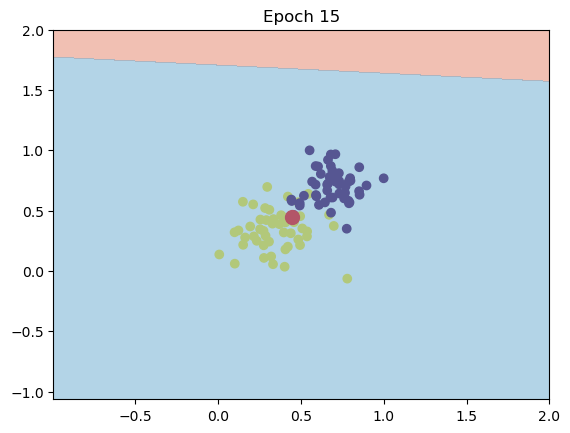

Training epoch: #15
Updated Weight: [[-0.01995835]
 [-0.296175  ]]
Updated Bias: 0.5054739237572391


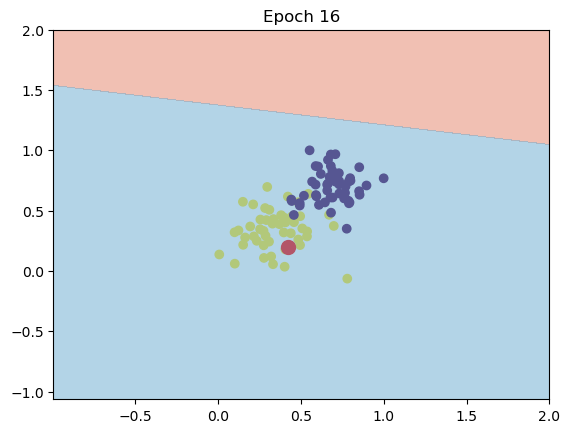

Training epoch: #16
Updated Weight: [[-0.05426235]
 [-0.33112554]]
Updated Bias: 0.45547392375723905


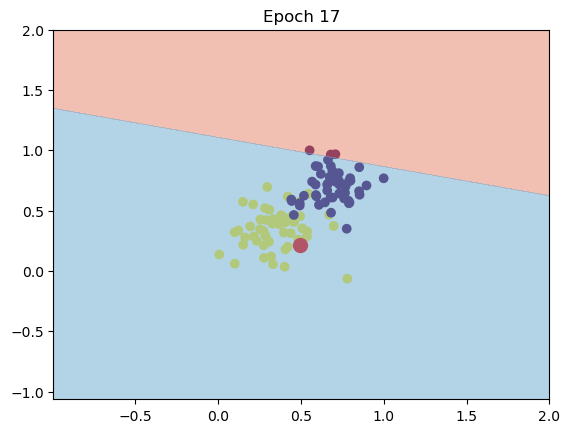

Training epoch: #17
Updated Weight: [[-0.08856635]
 [-0.36607608]]
Updated Bias: 0.405473923757239


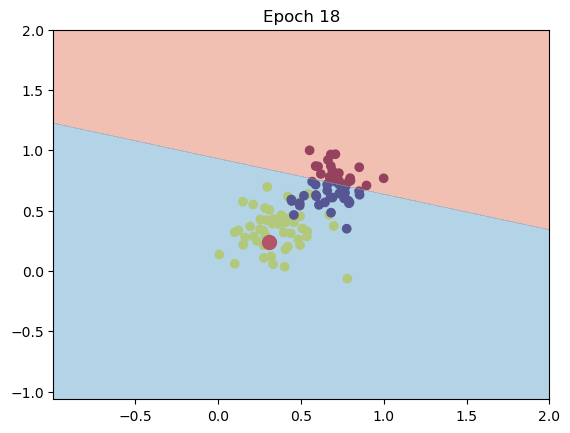

Training epoch: #18
Updated Weight: [[-0.11591737]
 [-0.39224934]]
Updated Bias: 0.36547392375723897


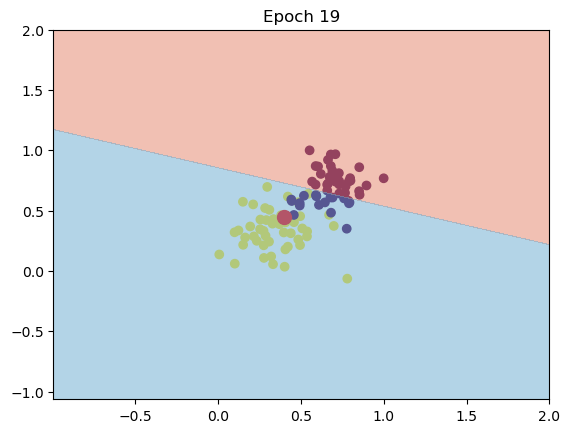

Training epoch: #19
Updated Weight: [[-0.12868713]
 [-0.40366845]]
Updated Bias: 0.34547392375723895


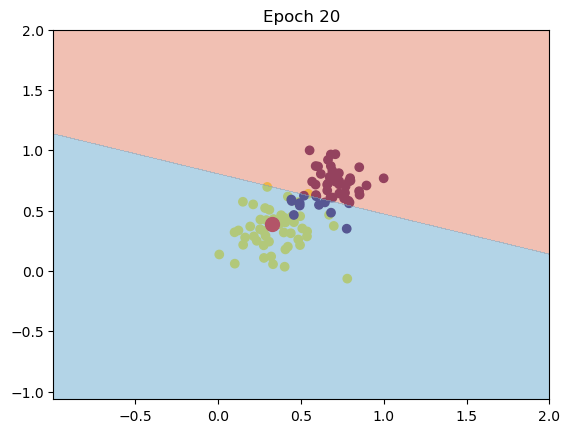

Training epoch: #20
Updated Weight: [[-0.13711008]
 [-0.41135932]]
Updated Bias: 0.33147392375723894


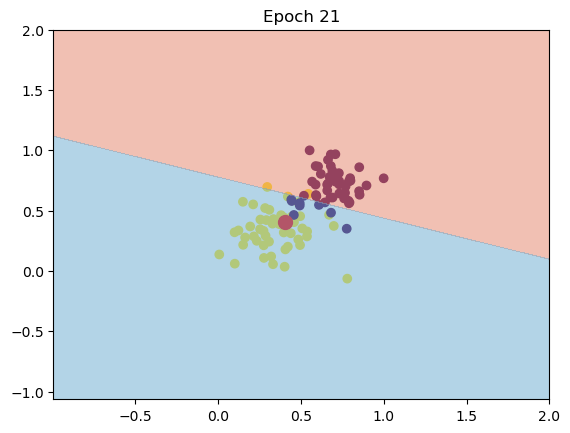

Training epoch: #21
Updated Weight: [[-0.14161381]
 [-0.41541005]]
Updated Bias: 0.32347392375723893


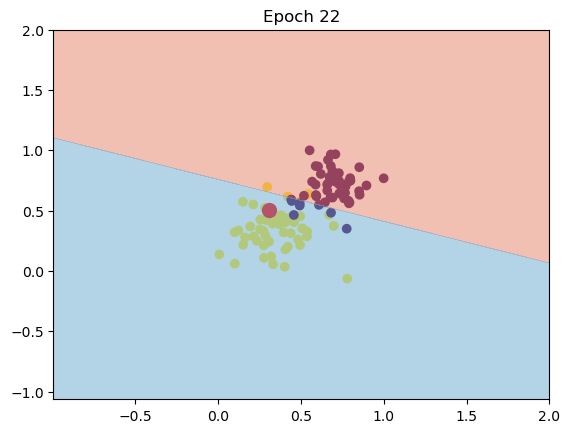

Training epoch: #22
Updated Weight: [[-0.14517413]
 [-0.41819585]]
Updated Bias: 0.31747392375723893


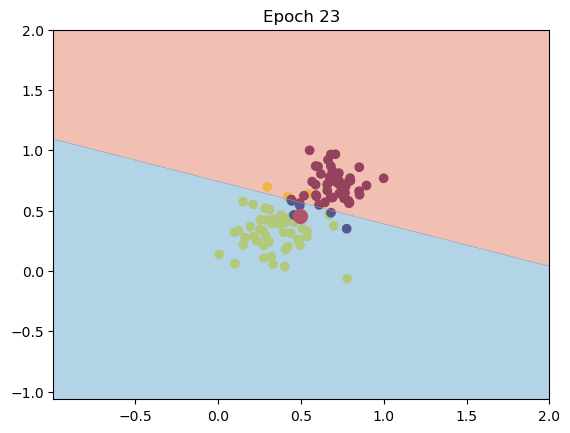

Training epoch: #23
Updated Weight: [[-0.14812471]
 [-0.42043408]]
Updated Bias: 0.3124739237572389


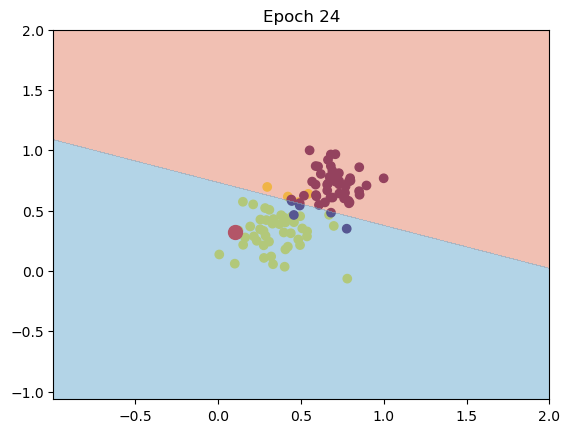

Training epoch: #24
Updated Weight: [[-0.15020757]
 [-0.42147574]]
Updated Bias: 0.3094739237572389


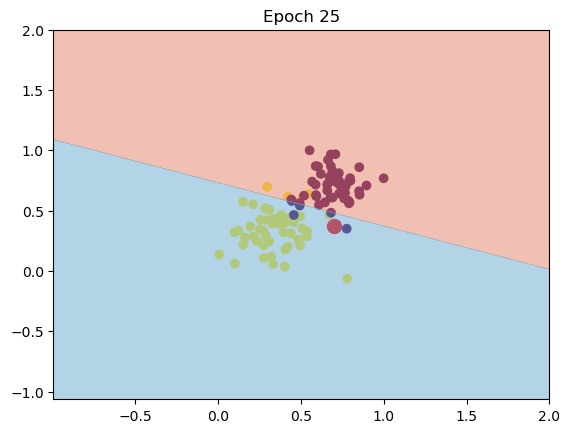

Training epoch: #25
Updated Weight: [[-0.15136322]
 [-0.42135544]]
Updated Bias: 0.3084739237572389


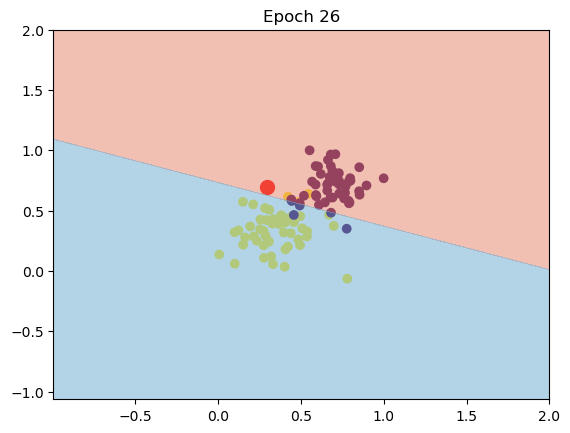

Training epoch: #26
Updated Weight: [[-0.15202523]
 [-0.4206729 ]]
Updated Bias: 0.3084739237572389


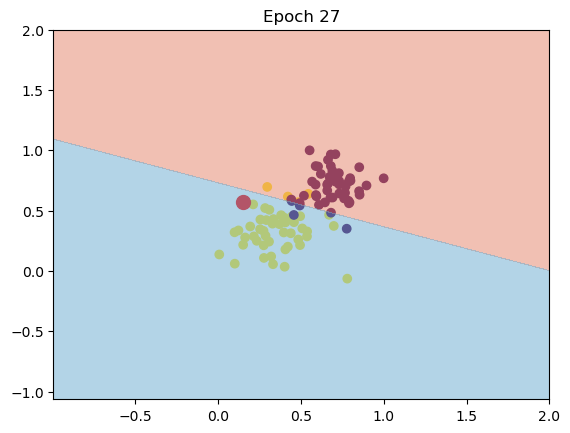

Training epoch: #27
Updated Weight: [[-0.15318088]
 [-0.4205526 ]]
Updated Bias: 0.3074739237572389


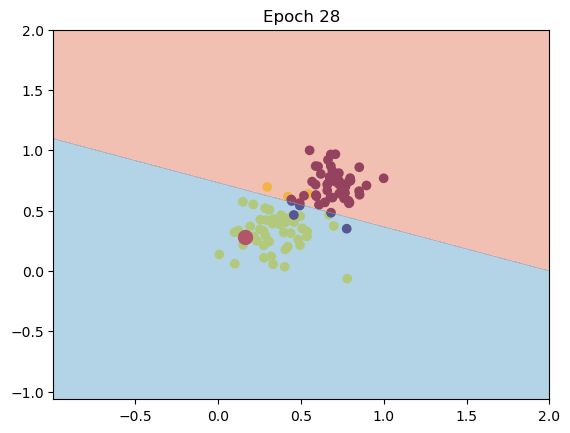

Training epoch: #28
Updated Weight: [[-0.15384289]
 [-0.41987006]]
Updated Bias: 0.3074739237572389


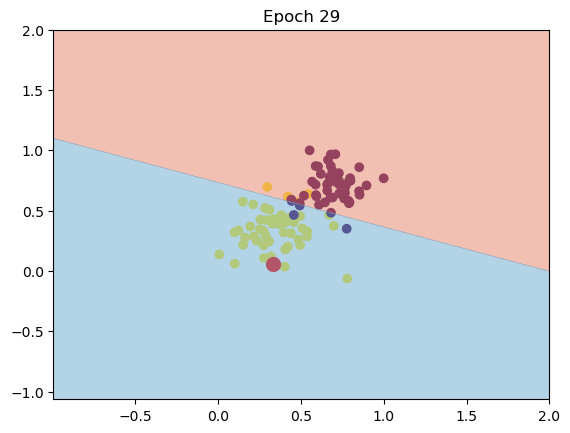

Training epoch: #29
Updated Weight: [[-0.1545049 ]
 [-0.41918752]]
Updated Bias: 0.3074739237572389


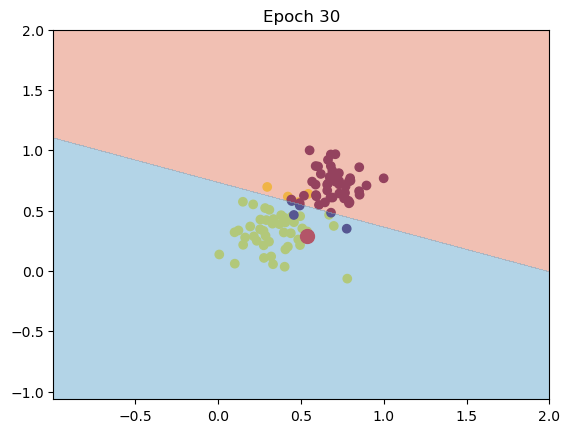

Training epoch: #30
Updated Weight: [[-0.15516691]
 [-0.41850498]]
Updated Bias: 0.3074739237572389


(array([[-0.15516691],
        [-0.41850498]]),
 0.3074739237572389)

In [51]:
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
model_train = trainPerceptronAlgorithm(X, y, 
                                 learn_rate=0.001, 
                                 num_epochs=30)
model_train

In [52]:
# Make a prediction from the model training
final_model = model_train
weight, bias = final_model

print(f"weight: {weight}")
print(f"bias: {bias}")

weight: [[-0.15516691]
 [-0.41850498]]
bias: 0.3074739237572389


In [53]:
prediction(X=[-1, 0.5], W=weight, b=bias)

1